In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Shotest path Algorithm

## Patients to coordinate

### Priority of patients (coordinate ver. 7*7)

In [ ]:
def patients_sequence_left_to_right(p1, p2, p3, p4, p5): # p is point (x,y)
  table = [[' ' for i in range(0,7)] for i in range(0,7)]
  table[0][3] = '0'
  patients = [p1, p2, p3, p4, p5]

  for point in patients:
    mark = 'x' 
    x = point[0]
    y = point[1]
    table[x][y] = mark
  
  priority = 1

  for row in range(0,7):
    for col in range(1,4):
      if table[row][col] == 'x':
        table[row][col] = str(priority)
        priority = priority + 1

  for row in range(6,-1,-1):
    for col in range(4,7):
      if table[row][col] == 'x':
        table[row][col] = str(priority)
        priority = priority + 1

  return table

In [ ]:
p1 = (2,1)
p2 = (5,1)
p3 = (5,3)
p4 = (6,1)
p5 = (6,6)
patients = [p1, p2, p3, p4, p5]

In [ ]:
patients_sequence_left_to_right(p1, p2, p3, p4, p5)

[[' ', ' ', ' ', '0', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', '1', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', '2', ' ', '3', ' ', ' ', ' '],
 [' ', '4', ' ', ' ', ' ', ' ', '5']]

## find parking for patients (box ver. 6*6)

### initial the map

In [ ]:
p1 = [(4,4), 1]
p2 = [(1,1), 2]
p3 = [(2,5), 2]
p4 = [(3,0), 2]
p5 = [(0,3), 3]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

In [ ]:
p1 = [(0,0), 1]
p2 = [(1,0), 2]
p3 = [(1,5), 3]
p4 = [(3,2), 2]
p5 = [(5,4), 1]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

In [ ]:
p1 = [(0,0), 3]
p2 = [(1,5), 2]
p3 = [(2,2), 1]
p4 = [(3,2), 2]
p5 = [(5,4), 1]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

In [ ]:
p1 = [(0,5), 2]
p2 = [(2,3), 2]
p3 = [(2,5), 3]
p4 = [(3,4), 2]
p5 = [(5,5), 2]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

In [ ]:
p1 = [(0,2), 3]
p2 = [(1,4), 2]
p3 = [(2,1), 2]
p4 = [(3,3), 1]
p5 = [(4,2), 2]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

In [ ]:
print(patients)
print(points)

[[(0, 2), 3], [(1, 4), 2], [(2, 1), 2], [(3, 3), 1], [(4, 2), 2]]
[(0, 2), (1, 4), (2, 1), (3, 3), (4, 2)]


In [ ]:
table = [[0 for i in range(0,6)] for i in range(0,6)]
patients = [p1, p2, p3, p4, p5]
for patient in patients:
  point = patient[0]
  priority = patient[1]
  x = point[0]
  y = point[1]
  if priority == 3:
    table[x][y] = 'L3'
  elif priority == 2:
    table[x][y] = 'L2'
  elif priority == 1:
    table[x][y] = 'L1'
table

[[0, 0, 'L3', 0, 0, 0],
 [0, 0, 0, 0, 'L2', 0],
 [0, 'L2', 0, 0, 0, 0],
 [0, 0, 0, 'L1', 0, 0],
 [0, 0, 'L2', 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
# create mask to use with A*
from copy import deepcopy
maze = deepcopy(table)
for i in range(0,6):
  for j in range(0,6):
    if maze[i][j] == 'L1' or maze[i][j] == 'L2' or maze[i][j] == 'L3':
      maze[i][j] = 1
maze

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

##### find all patients around in each box and assign weight each

In [ ]:
# add area where it has more than 1 patient
for i in range(0,6):
  for j in range(0,6):
    point = (i,j)
    if point not in points:
      x = point[0]
      y = point[1]
      count = 0
      for row in range(x-1,x+2):
        for col in range(y-1,y+2):
          if row > -1 and col > -1 and row < 6 and col < 6: # in range 0 - 5
            if (row,col) != (x,y):
              if table[row][col] == 'L1':
                count = count + 1
              elif table[row][col] == 'L2':
                count = count + 5
              elif table[row][col] == 'L3':
                count = count + 25
      table[x][y] = count

In [ ]:
from tabulate import tabulate
print(tabulate(table))

-  --  --  --  --  -
0  25  L3  30  5   5
5  30  30  30  L2  5
5  L2  6   6   6   5
5  10  11  L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -


In [ ]:
initial_table = deepcopy(table)
initial_table

[[0, 25, 'L3', 30, 5, 5],
 [5, 30, 30, 30, 'L2', 5],
 [5, 'L2', 6, 6, 6, 5],
 [5, 10, 11, 'L1', 1, 0],
 [0, 5, 'L2', 6, 1, 0],
 [0, 5, 5, 5, 0, 0]]

### Find Direction to go to

##### Utils functions

In [ ]:
def find_max_weight(table): # หาว่าตอนนี้ใน table ค่า weight ไหนคือค่าที่มากที่สุด
  max = 0
  for i in range(0,6):
    for j in range(0,6):
      if type(table[i][j]) is not str:
        if table[i][j] >= max:
          max = table[i][j]
  return max

In [ ]:
def find_max_positions(max, table): # หาตำแหน่งที่มีค่า weight ที่มากที่สุดทั้งหมดใน table
  max_positions = []
  for i in range(0,6):
    for j in range(0,6):
      if table[i][j] == max:
        point = (i,j)
        max_positions.append(point)
  return max_positions

In [ ]:
def patients_healed_positions(point): # to check patients around that max_positions points
  x = point[0]
  y = point[1]
  patient_points = []
  for i in range(x-1, x+2):
    for j in range(y-1, y+2):
      if i > -1 and i < 6 and j > -1 and j < 6:
        if table[i][j] == 'L1':
          print("degree of patient: {}, position of patient: {}".format('L1', (i,j)))
          point = (i,j)
          patient_points.append(point)
        elif table[i][j] == 'L2':
          print("degree of patient: {}, position of patient: {}".format('L2', (i,j)))
          point = (i,j)
          patient_points.append(point)
        elif table[i][j] == 'L3':
          print("degree of patient: {}, position of patient: {}".format('L3', (i,j)))
          point = (i,j)
          patient_points.append(point)
  return patient_points

In [ ]:
def clear_weight_around(point, table): # point: (x,y) - must input patient point
  x= point[0]
  y= point[1]
  priority = 0
  for i in range(x-1, x+2):
    for j in range(y-1, y+2):
      if i > -1 and i < 6 and j > -1 and j < 6:
        if (i,j) != (x,y) and type(table[i][j]) is int:
          for k in range(len(points)):
            if point == patients[k][0]:
              priority = patients[k][1]
          #print(table[i][j])
          if priority == 3:
            if (table[i][j] - 25) >= 0:
              try:
                table[i][j] = table[i][j] - 25
              except:
                pass
          elif priority == 2:
            if (table[i][j] - 5) >= 0:
              try:
                table[i][j] = table[i][j] - 5
              except:
                pass
          elif priority == 1:
            if (table[i][j] - 1) >= 0:
              try:
                table[i][j] = table[i][j] - 1
              except:
                pass

In [ ]:
def get_stop_point_and_clear_weight_table(table):
  max = find_max_weight(table)
  max_positions = find_max_positions(max, table)
  print("max weight's postions is/are {}".format(max_positions))

  pair_of_max_point_and_table = []

  for point in max_positions:
    print("--{}--".format(point))
    pt_points = patients_healed_positions(point)

    temp_table = deepcopy(table)
    for pt_point in pt_points:
      clear_weight_around(pt_point, temp_table)
    print(tabulate(temp_table))

    pair_of_max_point_and_table.append([point, temp_table])

  return pair_of_max_point_and_table

In [ ]:
def check_zero(table):
  sum = 0
  for i in range(0, 6):
    for j in range(0, 6):
      if type(table[i][j]) is int:
        sum = sum + table[i][j]
  return sum

In [ ]:
def find_min_index(next_step, start):
  max_pos = [i[0] for i in next_step]
  path_length = []
  for i in max_pos:
    start = start
    end = i
    path = astar(maze, start, end)
    path_length.append(len(path))
  # print(path_length)
  min_index = path_length.index(min(path_length))
  return min_index

In [ ]:
def check_back_point(maze, lastpoint):
  # check with a*
  path_length = []
  ends = [(5,2),(5,3)]
  start = lastpoint

  for i in ends:
    end = i
    path = astar(maze, start, end)
    path_length.append(len(path))

  min_index = path_length.index(min(path_length))
  return ends[min_index]

## Run the result

In [ ]:
initial_table = deepcopy(table)
path = [(5,2)]

while True:
  if check_zero(initial_table) == 0:
    break
  else:
    next_step = get_stop_point_and_clear_weight_table(initial_table)
    min_index = find_min_index(next_step, path[-1]) # the index that has the shortest distance from the start to the max weight point
    initial_table = next_step[min_index][1]
    path.append(next_step[min_index][0])

max weight's postions is/are [(0, 3), (1, 1), (1, 2), (1, 3)]
--(0, 3)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position of patient: (1, 4)
-  --  --  --  --  -
0  0   L3  0   0   0
5  5   5   0   L2  0
5  L2  6   1   1   0
5  10  11  L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -
--(1, 1)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position of patient: (2, 1)
-  --  --  --  --  -
0  0   L3  5   5   5
0  0   0   5   L2  5
0  L2  1   6   6   5
0  5   6   L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -
--(1, 2)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position of patient: (2, 1)
-  --  --  --  --  -
0  0   L3  5   5   5
0  0   0   5   L2  5
0  L2  1   6   6   5
0  5   6   L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -
--(1, 3)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position o

In [ ]:
path

[(5, 2), (1, 1), (2, 3), (3, 2), (4, 3), (4, 3), (4, 3), (4, 3)]

# Create weight-based shotest path algorithm function

> Input

In [ ]:
p1 = [(0,2), 3]
p2 = [(1,4), 2]
p3 = [(2,1), 2]
p4 = [(3,3), 1]
p5 = [(4,2), 2]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

In [ ]:
p1 = [(0,5), 2]
p2 = [(2,3), 2]
p3 = [(2,5), 3]
p4 = [(3,4), 2]
p5 = [(5,5), 2]
patients = [p1,p2,p3,p4,p5]
points = [patients[0][0], patients[1][0], patients[2][0], patients[3][0], patients[4][0]]

> Function

In [ ]:
from copy import deepcopy
from tabulate import tabulate

table = [[0 for i in range(0,6)] for i in range(0,6)]

def shortest_path_with_priority(patients, points):

  # Initial map
  #patients = [p1, p2, p3, p4, p5]
  for patient in patients:
    point = patient[0]
    priority = patient[1]
    x = point[0]
    y = point[1]
    if priority == 3:
      table[x][y] = 'L3'
    elif priority == 2:
      table[x][y] = 'L2'
    elif priority == 1:
      table[x][y] = 'L1'

  # Initial maze
  from copy import deepcopy
  maze = deepcopy(table)
  for i in range(0,6):
    for j in range(0,6):
      if maze[i][j] == 'L1' or maze[i][j] == 'L2' or maze[i][j] == 'L3':
        maze[i][j] = 1

  # assign weight around patients
  for i in range(0,6):
    for j in range(0,6):
      point = (i,j)
      if point not in points:
        x = point[0]
        y = point[1]
        count = 0
        for row in range(x-1,x+2):
          for col in range(y-1,y+2):
            if row > -1 and col > -1 and row < 6 and col < 6: # in range 0 - 5
              if (row,col) != (x,y):
                if table[row][col] == 'L1':
                  count = count + 1
                elif table[row][col] == 'L2':
                  count = count + 5
                elif table[row][col] == 'L3':
                  count = count + 25
        table[x][y] = count
  
  # Create Initial_table
  initial_table = deepcopy(table)

  # start path with point (5,2)
  path = [(5,2)]

  # loop until every area in the table is equal to 0, it means that it visited all patients
  while True:
    if check_zero(initial_table) == 0:
      break
    else:
      next_step = get_stop_point_and_clear_weight_table(initial_table)
      min_index = find_min_index(next_step, path[-1]) # the index that has the shortest distance from the start to the max weight point
      initial_table = next_step[min_index][1]
      path.append(next_step[min_index][0])

  lastpoint = check_back_point(maze, path[-1])
  path.append(lastpoint)

  return path, table, maze

In [ ]:
path, table, maze = shortest_path_with_priority(patients, points)

max weight's postions is/are [(0, 3), (1, 1), (1, 2), (1, 3)]
--(0, 3)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position of patient: (1, 4)
-  --  --  --  --  -
0  0   L3  0   0   0
5  5   5   0   L2  0
5  L2  6   1   1   0
5  10  11  L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -
--(1, 1)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position of patient: (2, 1)
-  --  --  --  --  -
0  0   L3  5   5   5
0  0   0   5   L2  5
0  L2  1   6   6   5
0  5   6   L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -
--(1, 2)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position of patient: (2, 1)
-  --  --  --  --  -
0  0   L3  5   5   5
0  0   0   5   L2  5
0  L2  1   6   6   5
0  5   6   L1  1   0
0  5   L2  6   1   0
0  5   5   5   0   0
-  --  --  --  --  -
--(1, 3)--
degree of patient: L3, position of patient: (0, 2)
degree of patient: L2, position o

In [ ]:
path

[(5, 2), (1, 1), (2, 3), (3, 2), (4, 3), (4, 3), (4, 3), (4, 3), (5, 2)]

In [ ]:
table

[[0, 0, 0, 0, 5, 'L2'],
 [0, 0, 5, 5, 35, 30],
 [0, 0, 5, 'L2', 35, 'L3'],
 [0, 0, 5, 10, 'L2', 30],
 [0, 0, 0, 5, 10, 10],
 [0, 0, 0, 0, 5, 'L2']]

In [ ]:
maze

[[0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1]]

# Post processing

### find path from start to end at each pair of path 

In [ ]:
path

[(5, 2), (1, 1), (2, 3), (3, 2), (4, 3), (4, 3), (4, 3), (4, 3)]

In [ ]:
maze

[[0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1]]

In [ ]:
true_path = []

patient_points = deepcopy(points)

for i in range(0, len(path) - 1):
  start = path[i]
  end = path[i+1]
  #print(start, end)
  path_pair = astar(maze, start, end)
  patients_pos = patients_healed_positions(path_pair[-1])
  # print(patients_pos)

  for j in patients_pos:
    if j in patient_points:
      path_pair_copy = deepcopy(path_pair)
      path_pair_copy.append(j)
      print(path_pair_copy)
      true_path.append(path_pair_copy)
    
  # drop patients out of patient_points
  for k in patients_pos:
    try:
      patient_points.remove(k)
    except:
      pass

# add last path to the beginning point
start = path[-2]
end = path[-1]
#print(start, end)
path_pair = astar(maze, start, end)
true_path.append(path_pair)

print()
true_path

degree of patient: L2, position of patient: (2, 3)
degree of patient: L3, position of patient: (2, 5)
degree of patient: L2, position of patient: (3, 4)
[(5, 2), (4, 3), (3, 3), (2, 4), (2, 3)]
[(5, 2), (4, 3), (3, 3), (2, 4), (2, 5)]
[(5, 2), (4, 3), (3, 3), (2, 4), (3, 4)]
degree of patient: L2, position of patient: (0, 5)
degree of patient: L2, position of patient: (2, 3)
degree of patient: L3, position of patient: (2, 5)
[(2, 4), (1, 4), (0, 5)]
degree of patient: L2, position of patient: (3, 4)
degree of patient: L2, position of patient: (5, 5)
[(1, 4), (2, 4), (3, 3), (4, 4), (5, 5)]



[[(5, 2), (4, 3), (3, 3), (2, 4), (2, 3)],
 [(5, 2), (4, 3), (3, 3), (2, 4), (2, 5)],
 [(5, 2), (4, 3), (3, 3), (2, 4), (3, 4)],
 [(2, 4), (1, 4), (0, 5)],
 [(1, 4), (2, 4), (3, 3), (4, 4), (5, 5)],
 [(4, 4), (5, 3)]]

In [ ]:
true_path[0][:-1]

[(5, 2), (4, 3), (3, 3), (2, 4)]

In [ ]:
for i in range(len(true_path)):
  path_1 = true_path[i][:-1]
  #path_2 = true_path[i+1][:-1]
  for j in range(len(true_path)):
    if j != i:
      if path_1 == true_path[j][:-1]:
        true_path[j] = true_path[j][-2:]

In [ ]:
true_path

[[(5, 2), (4, 3), (3, 3), (2, 4), (2, 3)],
 [(2, 4), (2, 5)],
 [(2, 4), (3, 4)],
 [(2, 4), (1, 4), (0, 5)],
 [(1, 4), (2, 4), (3, 3), (4, 4), (5, 5)],
 [(4, 4), (5, 3)]]

เติมทางเดิน

In [ ]:
fill_path_in = [(10,2),(9,2),(8,2),(7,2),(6,2)]
fill_path_out = [(6,2), (7,2), (8,2), (9,2), (10,2)]
true_path[0] = fill_path_in + true_path[0]
true_path[-1] = true_path[-1] + fill_path_out

true_path

[[(10, 2),
  (9, 2),
  (8, 2),
  (7, 2),
  (6, 2),
  (5, 2),
  (4, 3),
  (3, 3),
  (2, 4),
  (2, 3)],
 [(2, 4), (2, 5)],
 [(2, 4), (3, 4)],
 [(2, 4), (1, 4), (0, 5)],
 [(1, 4), (2, 4), (3, 3), (4, 4), (5, 5)],
 [(4, 4), (5, 3), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2)]]

เปลี่ยน tuple เป็น list

In [ ]:
for i in range(len(true_path)):
  for j in range(len(true_path[i])):
    true_path[i][j] = list(true_path[i][j])
true_path

[[[10, 2],
  [9, 2],
  [8, 2],
  [7, 2],
  [6, 2],
  [5, 2],
  [4, 3],
  [3, 3],
  [2, 4],
  [2, 3]],
 [[2, 4], [2, 5]],
 [[2, 4], [3, 4]],
 [[2, 4], [1, 4], [0, 5]],
 [[1, 4], [2, 4], [3, 3], [4, 4], [5, 5]],
 [[4, 4], [5, 3], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2]]]

เปลี่ยนแกน x

In [ ]:
def patTranform(finalPath):
  ppatPath = finalPath.copy()
  for i in range(len(finalPath)):
    for j in range(len(finalPath[i])):
      # print(finalPath[i][j])
      ppatPath[i][j][0] = abs(finalPath[i][j][0]-10)
  return ppatPath

In [ ]:
patTranform(true_path)

[[[0, 2],
  [1, 2],
  [2, 2],
  [3, 2],
  [4, 2],
  [5, 2],
  [6, 3],
  [7, 3],
  [8, 4],
  [8, 3]],
 [[8, 4], [8, 5]],
 [[8, 4], [7, 4]],
 [[8, 4], [9, 4], [10, 5]],
 [[9, 4], [8, 4], [7, 3], [6, 4], [5, 5]],
 [[6, 4], [5, 3], [4, 2], [3, 2], [2, 2], [1, 2], [0, 2]]]

<hr>

In [ ]:
def pput_format(patients, points):
  path, table, maze = shortest_path_with_priority(patients, points)

  true_path = []

  patient_points = deepcopy(points)

  for i in range(0, len(path) - 1):
    start = path[i]
    end = path[i+1]
    #print(start, end)
    path_pair = astar(maze, start, end)
    patients_pos = patients_healed_positions(path_pair[-1])
    # print(patients_pos)

    for j in patients_pos:
      if j in patient_points:
        path_pair_copy = deepcopy(path_pair)
        path_pair_copy.append(j)
        print(path_pair_copy)
        true_path.append(path_pair_copy)
      
    # drop patients out of patient_points
    for k in patients_pos:
      try:
        patient_points.remove(k)
      except:
        pass

  # add last path to the beginning point
  start = path[-2]
  end = path[-1]
  #print(start, end)
  path_pair = astar(maze, start, end)
  true_path.append(path_pair)

  # last postprocess
  for i in range(len(true_path)-1):
    path_1 = true_path[i][:-1]
    path_2 = true_path[i+1][:-1]
    if path_1 == path_2:
      true_path[i+1] = true_path[i+1][-2:]

  return true_path

In [ ]:
pput_format(patients, points)

max weight's postions is/are [(0, 4), (0, 5), (1, 4), (2, 4), (2, 5)]
--(0, 4)--
degree of patient: L3, position of patient: (1, 5)
--  --  --  -  --  --
L1   6  0   0  0   0
L2   6  0   0  0   L3
5   10  5   5  0   0
0    5  L2  5  0   0
0    5  5   6  1   1
0    0  0   1  L1  1
--  --  --  -  --  --
--(0, 5)--
degree of patient: L3, position of patient: (1, 5)
--  --  --  -  --  --
L1   6  0   0  0   0
L2   6  0   0  0   L3
5   10  5   5  0   0
0    5  L2  5  0   0
0    5  5   6  1   1
0    0  0   1  L1  1
--  --  --  -  --  --
--(1, 4)--
degree of patient: L3, position of patient: (1, 5)
--  --  --  -  --  --
L1   6  0   0  0   0
L2   6  0   0  0   L3
5   10  5   5  0   0
0    5  L2  5  0   0
0    5  5   6  1   1
0    0  0   1  L1  1
--  --  --  -  --  --
--(2, 4)--
degree of patient: L3, position of patient: (1, 5)
--  --  --  -  --  --
L1   6  0   0  0   0
L2   6  0   0  0   L3
5   10  5   5  0   0
0    5  L2  5  0   0
0    5  5   6  1   1
0    0  0   1  L1  1
--  --  --  -  --  -

KeyboardInterrupt: ignored

# A-star Alogorithm

In [ ]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

In [ ]:
maze = [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]

start = (1, 1)
end = (3, 5)

path = astar(maze, start, end)
print(path)

[(1, 1), (2, 2), (3, 3), (3, 4), (3, 5)]


# Travelling Saleman

In [ ]:
# Python3 program to implement traveling salesman
# problem using naive approach.
from sys import maxsize
from itertools import permutations
 
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s, V): #s: start, V:vertices
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
    print(vertex)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize # just a largest number - or inf in the algorithm
    next_permutation=permutations(vertex) #just get every pairs of vertices from the selected vertex

    for i in next_permutation:
 
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
 
        # update minimum
        min_path = min(min_path, current_pathweight)
         
    return min_path

In [ ]:
# matrix representation of graph
graph = [[0, 10, 15, 20], [10, 0, 35, 25],
        [15, 35, 0, 30], [20, 25, 30, 0]]
s = 0
print(travellingSalesmanProblem(graph, s, V=4))

[1, 2, 3]
next_permutation is <itertools.permutations object at 0x7fe772508e90>
80


In [ ]:
p_start = (0,3)
p1 = (1,5)
p2 = (3,5)
p3 = (3,3)
p4 = (4,1)
p5 = (5,2)
patients = [p_start, p1, p2, p3, p4, p5]

graph = find_all_pair_distance(patients)
s = 0 #start point
print(travellingSalesmanProblem(graph, s, V=6))

[1, 2, 3, 4, 5]
next_permutation is <itertools.permutations object at 0x7fe772508110>
18


In [ ]:
v = [1, 2, 3, 4, 5]
next_permutation = permutations(v)
list(next_permutation)

# <hr>

# FuncAnimation

In [ ]:
!pip install animation

  Created wheel for pychalk: filename=pychalk-2.0.1-py3-none-any.whl size=7667 sha256=4f65ece0530e0adb40004df283947198526ef5f999201a307e1bca995b589c0a
  Stored in directory: /root/.cache/pip/wheels/82/52/3d/0b82939aff61587fc59700c774dd1b2f1df570848fd324444c
Successfully built pychalk


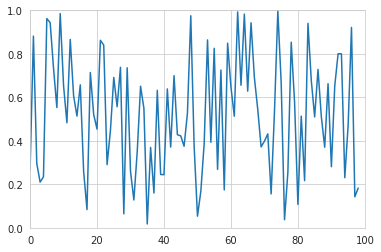

In [ ]:
x = range(100)
y = np.random.rand(100)

fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
graph, = plt.plot([], [], '-')

def init():
    return graph,

def animate(i):
    graph.set_data(x[:i],y[:i])
    return graph,

ani = FuncAnimation(fig, animate, frames=range(len(x)), interval=50, save_count=len(x),
                    init_func=init, blit=True)
ani.save('ani.gif', writer='pillow')

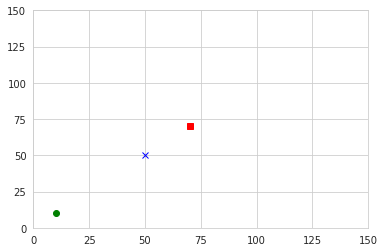

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

sns.set_style("whitegrid")
    
n=100
x_temp = [np.linspace(10, 100, n),
          np.linspace(50, 120, n),
          np.linspace(70, 90, n)]
y_temp = [np.linspace(10, 100, n),
          np.linspace(50, 120, n),
          np.linspace(70, 90, n)]


fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 150), ylim=(0, 150))
plt.xticks([0, 25,50,75,100,125,150])
plt.yticks([0, 25,50,75,100,125,150])

points = []
for j, (col, mar) in enumerate(zip(["green", "blue", "red"], ["o", "x", "s"])):
    newpoint, = ax.plot(x_temp[j][0], y_temp[j][0], color=col, marker=mar)
    points.append(newpoint)

def animation_frames(i):
    for j in range(0,3):
        points[j].set_data(x_temp[j][i], y_temp[j][i])        


animation = FuncAnimation(fig, animation_frames, frames=len(x_temp[0]), interval=30)
animation.save('animationBrownianMotion2d.gif', writer='pillow', fps=30)
    
plt.show()

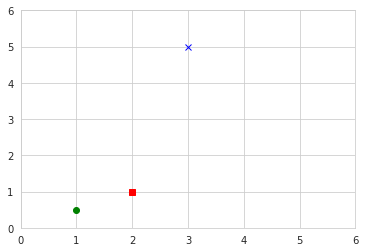

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

sns.set_style("whitegrid")
    
n=100
x_temp = [np.linspace(1, 1.5, n),
          np.linspace(3, 5.5, n),
          np.linspace(2, 6, n)]
y_temp = [np.linspace(0.5, 3, n),
          np.linspace(5, 6, n),
          np.linspace(1, 4, n)]

coordinates = [(0.5,0.5), (1.5,2.5), (4.5, 5.5), (5.5, 3.5), (3.5, 2.5)]

x = [i[0] for i in coordinates]
y = [i[1] for i in coordinates]

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 6), ylim=(0, 6))
plt.xticks([0,1,2,3,4,5,6])
plt.yticks([0,1,2,3,4,5,6])

points = []
for j, (col, mar) in enumerate(zip(["green", "blue", "red"], ["o", "x", "s"])):
    newpoint, = ax.plot(x_temp[j][0], y_temp[j][0], color=col, marker=mar)
    points.append(newpoint)

for i in coordinates:
  ax.plot(i[0], i[1])

def animation_frames(i):
    for j in range(0,3):
        points[j].set_data(x_temp[j][i], y_temp[j][i])        

animation = FuncAnimation(fig, animation_frames, frames=len(x_temp[0]), interval=30)
animation.save('animationBrownianMotion2d.gif', writer='pillow', fps=30)
    
plt.show()